<a href="https://colab.research.google.com/github/borgesf/nicePythonPlots/blob/main/Figure_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

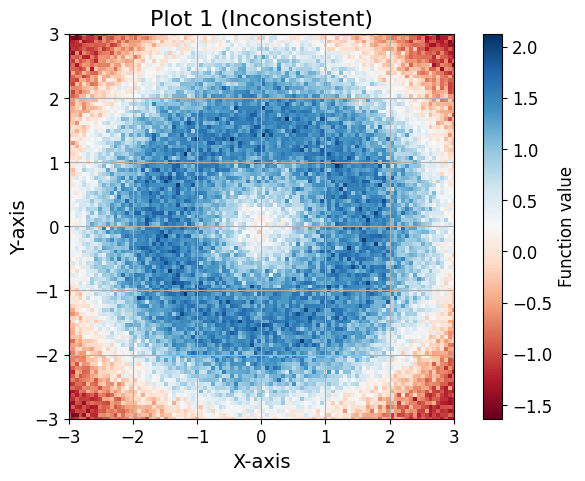

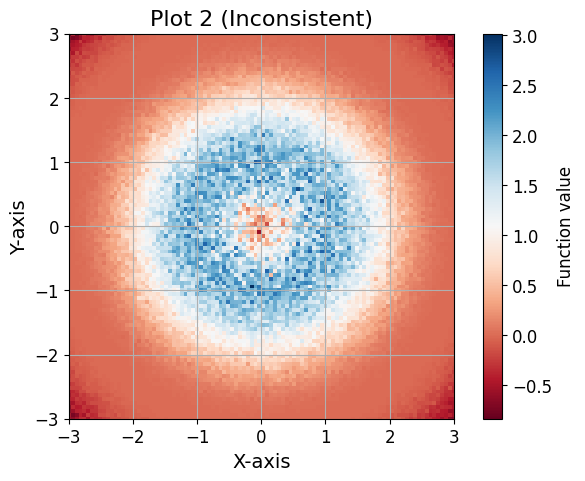

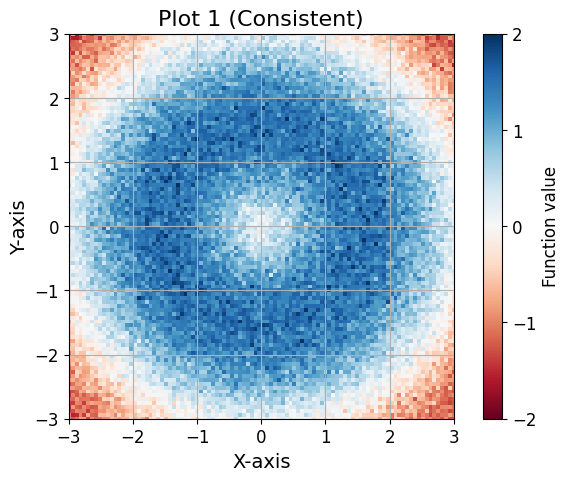

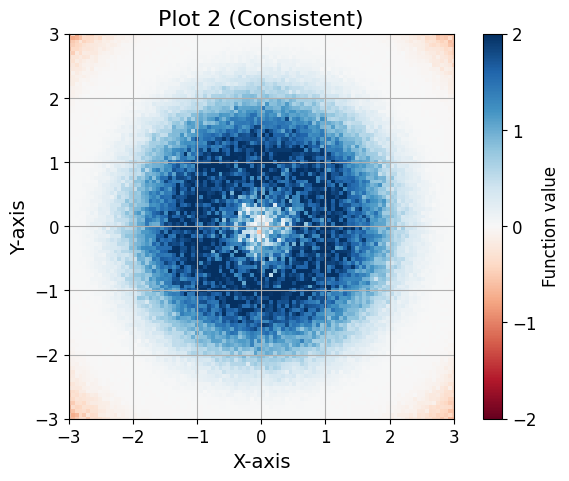

In [ ]:
%matplotlib inline
# This magic command ensures plots appear in the notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, ListedColormap

# Update global font settings (DejaVu Sans is the default, but we set it explicitly)
plt.rcParams.update({'font.family': 'DejaVu Sans', 'font.size': 12})

# Generate two synthetic surfaces
x = np.linspace(-3, 3, 100)  # X range −3 … 3
y = np.linspace(-3, 3, 100)  # Y range −3 … 3
X, Y = np.meshgrid(x, y)
np.random.seed(0)            # Seed for reproducibility
Z1 = 1.5 * np.sin(np.sqrt(X**2 + Y**2)) + 0.2 * np.random.randn(*X.shape)
Z2 = (1 + np.cos(np.sqrt(X**2 + Y**2))) * Z1

# Prepare a diverging colormap and define end‑colours for out‑of‑range values
base_cmap = plt.get_cmap('RdBu')
cmap = ListedColormap(base_cmap(np.linspace(0, 1, 256)))
cmap.set_under(cmap(0))    # Colour for values below vmin
cmap.set_over(cmap(255))   # Colour for values above vmax

# Plot “inconsistent” panels (each autoscaled)
for Z, title in [(Z1, 'Plot 1 (Inconsistent)'), (Z2, 'Plot 2 (Inconsistent)')]:
    plt.figure(figsize=(7.5, 5))
    pm = plt.pcolormesh(X, Y, Z, cmap=cmap, shading='auto')  # continuous scale
    plt.colorbar(pm, label='Function value')
    plt.title(title, fontsize=16)
    plt.xlabel('X-axis', fontsize=14)
    plt.ylabel('Y-axis', fontsize=14)
    plt.xlim(-3, 3); plt.ylim(-3, 3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)

# Define a symmetric normalizer for consistent colour limits (−2 … 2)
norm_consistent = Normalize(vmin=-2, vmax=2, clip=True)
ticks_consistent = np.arange(-2, 3, 1)

# Plot “consistent” panels (shared limits and symmetric colour‑bar)
for Z, title in [(Z1, 'Plot 1 (Consistent)'), (Z2, 'Plot 2 (Consistent)')]:
    plt.figure(figsize=(7.5, 5))
    pm = plt.pcolormesh(
        X, Y, Z,
        cmap=cmap,
        norm=norm_consistent,
        shading='auto'
    )
    plt.colorbar(pm, ticks=ticks_consistent, label='Function value')
    plt.title(title, fontsize=16)
    plt.xlabel('X-axis', fontsize=14)
    plt.ylabel('Y-axis', fontsize=14)
    plt.xlim(-3, 3); plt.ylim(-3, 3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)

plt.show()
